In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataUS = pd.read_csv("data/youtube/USvideos.csv")
jsonUS = pd.read_json("data/youtube/US_category_id.json")

In [3]:
dataUS.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
dCat = {}
for i in jsonUS["items"].tolist():
    dCat[int(i["id"])] = i["snippet"]["title"]

In [5]:
dataUS.category_id.replace(dCat, inplace=True)

In [6]:
dataUS.T.iloc[:, 0:1]

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
category_id,People & Blogs
publish_time,2017-11-13T17:13:01.000Z
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966


In [7]:
dataUS.category_id.unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [8]:
frequencia = pd.crosstab(dataUS.comments_disabled, dataUS["category_id"])

In [9]:
frequencia

category_id,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
comments_disabled,,,,,,,,,,,,,,,,
False,379,3455,1648,9768,2317,809,4135,6463,2313,53,3144,916,2311,57,2146,402
True,5,2,8,196,28,8,11,9,174,4,66,4,90,0,28,0


In [10]:
dataUS.groupby("category_id").sum().views.sort_values(ascending=False)

category_id
Music                    40132892190
Entertainment            20604388195
Film & Animation          7284156721
Comedy                    5117426208
People & Blogs            4917191726
Sports                    4404456673
Howto & Style             4078545064
Science & Technology      3487756816
Gaming                    2141218625
News & Politics           1473765704
Education                 1180629990
Pets & Animals             764651989
Autos & Vehicles           520690717
Travel & Events            343557084
Nonprofits & Activism      168941392
Shows                       51501058
Name: views, dtype: int64

In [11]:
dataUS.groupby("category_id").sum().likes.sort_values(ascending=False)

category_id
Music                    1416838584
Entertainment             530516491
Comedy                    216346746
People & Blogs            186615999
Film & Animation          165997476
Howto & Style             162880075
Sports                     98621211
Science & Technology       82532638
Gaming                     69038284
Education                  49257772
Pets & Animals             19370702
News & Politics            18151033
Nonprofits & Activism      14815646
Travel & Events             4836246
Autos & Vehicles            4245656
Shows                       1082639
Name: likes, dtype: int64

In [12]:
dataUS.groupby("category_id").sum().dislikes.sort_values(ascending=False)

category_id
Music                    51179008
Entertainment            42987663
People & Blogs           10187901
Gaming                    9184466
Comedy                    7230391
Film & Animation          6075148
Howto & Style             5473899
Sports                    5133551
Science & Technology      4548402
News & Politics           4180049
Nonprofits & Activism     3310381
Education                 1351972
Pets & Animals             527379
Travel & Events            340427
Autos & Vehicles           243010
Shows                       24508
Name: dislikes, dtype: int64

In [13]:
dataUS['mes'] = pd.to_datetime(dataUS['publish_time'])

In [14]:
def toYearMonth(x):
    return str(x.year) + "_" + str(x.month)


dataUS['year_month'] = dataUS['mes'].apply(toYearMonth)

In [15]:
def toMonth(x):
    return str(x.month)

dataUS['month'] = dataUS['mes'].apply(toMonth)

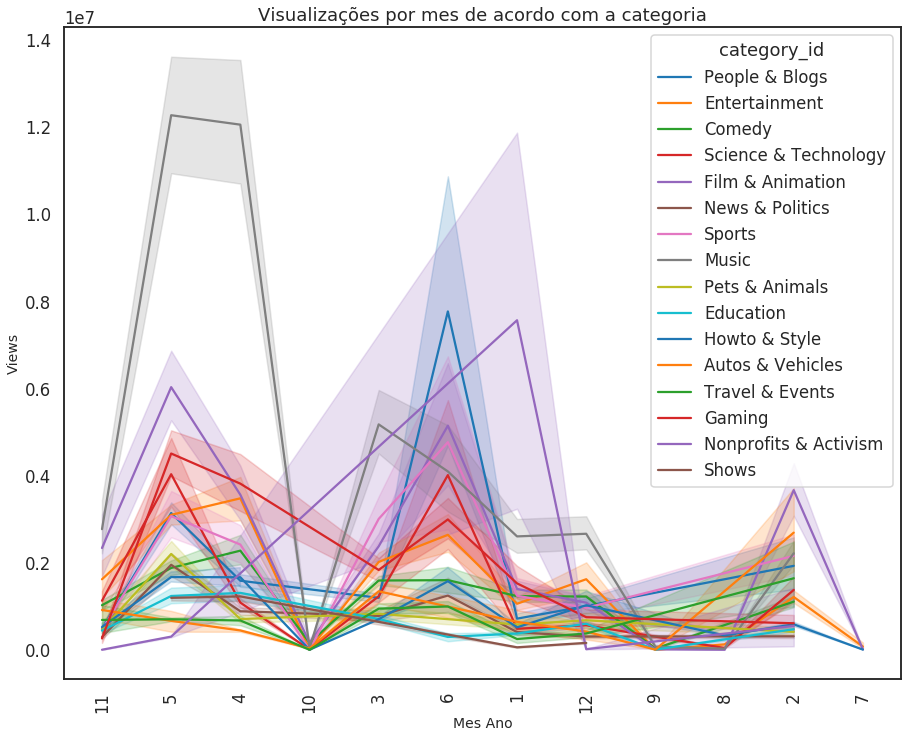

In [16]:
palette = sns.color_palette("tab10", 16)
sns.set_theme(style="white", context="talk")

ax = sns.lineplot(x='month', y='views', hue="category_id", data=dataUS, palette=palette)

ax.figure.set_size_inches(15,12)
ax.set_title("Visualizações por mes de acordo com a categoria", loc='center', fontsize=18)
ax.set_xlabel("Mes Ano", fontsize=14)
ax.set_ylabel("Views", fontsize=14)
plt.xticks(rotation=90)

ax = ax

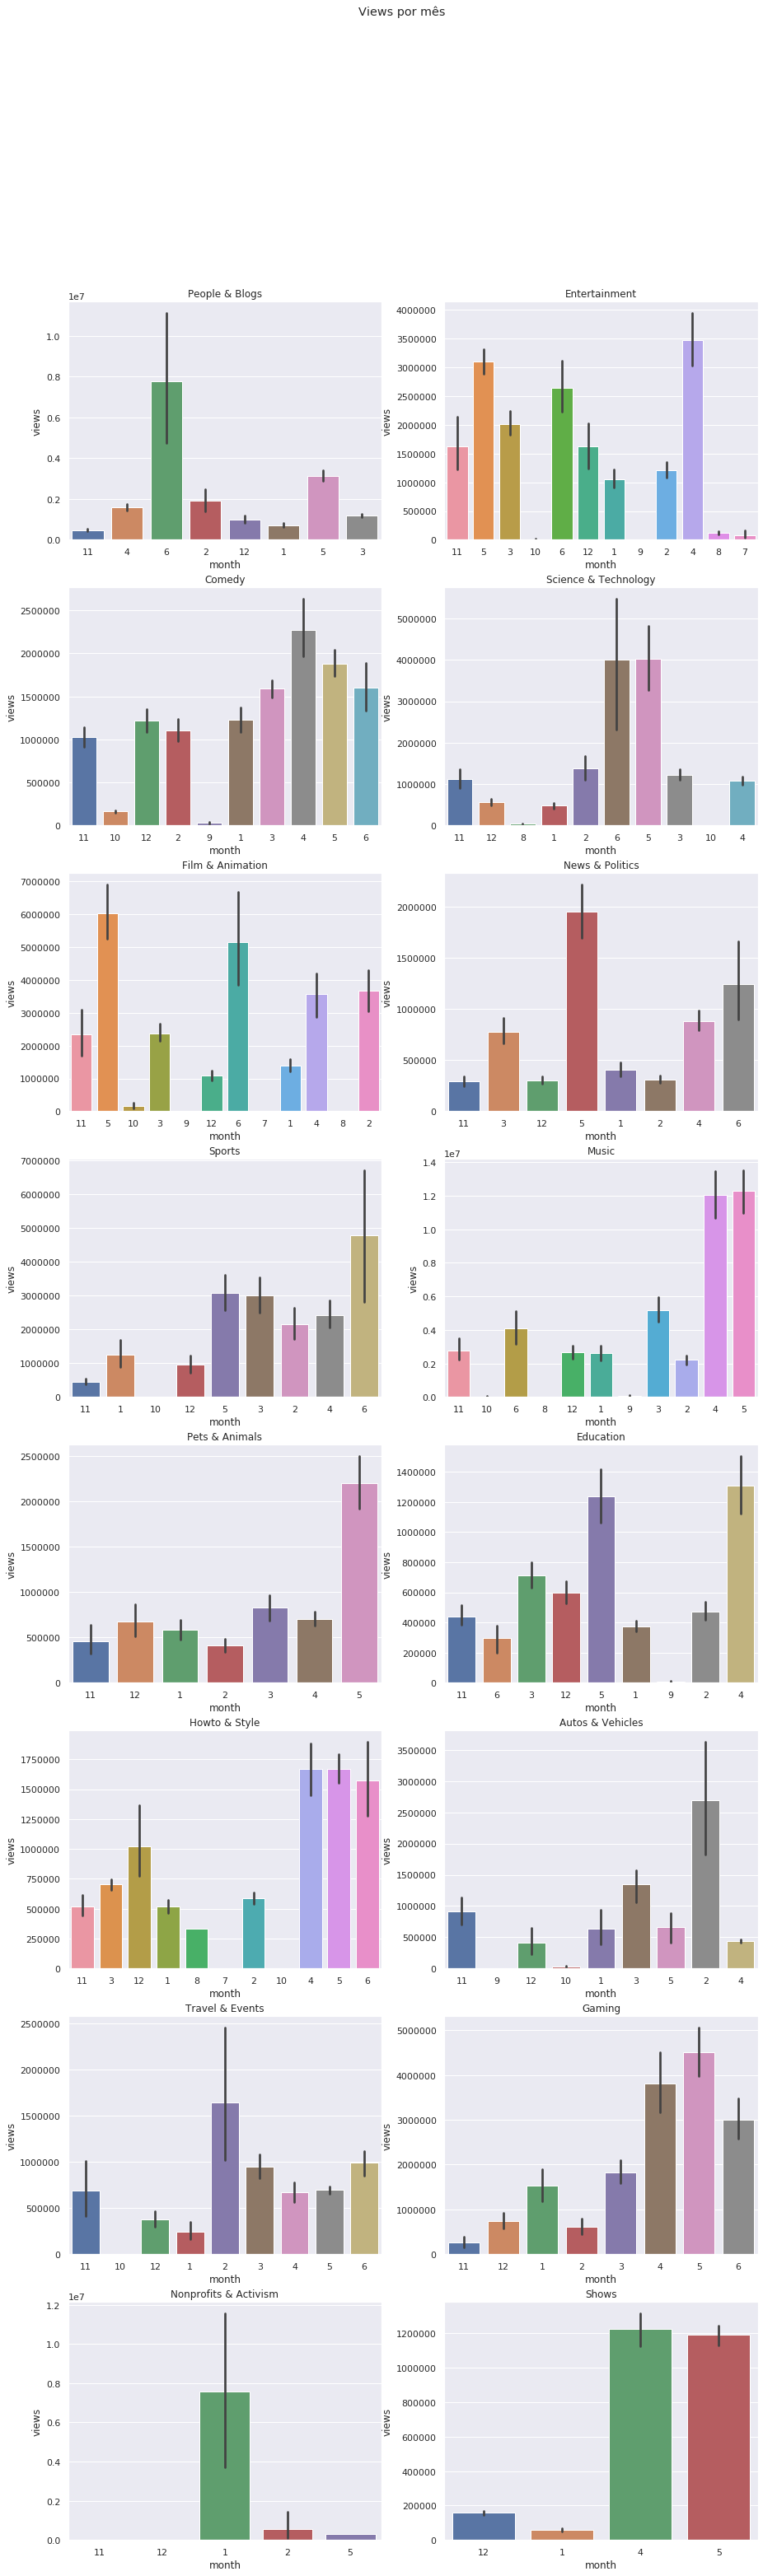

In [136]:
lc = dataUS.category_id.unique().tolist()

fig, axes = plt.subplots(8, 2, figsize=(15, 50))
# print(axes)
fig.suptitle('Views por mês')
ldq = []
index = 0
for i in lc: 
    ldq.append(dataUS.query("category_id == '"+i+"'"))

for m,i in enumerate(axes):    
    for j,k in enumerate(i):
        
        sns.barplot(ax=k, x=ldq[index].month, y=ldq[index].views)
#         ax.set(rc={'figure.figsize':(11.7,50)})
        k.set_title(lc[index])
        index+=1


In [169]:
dataUS.groupby("comments_disabled").sum().T[False][1]/dataUS.groupby("comments_disabled").sum().T[False][2]

20.146388557550733

In [171]:
dataUS.groupby("comments_disabled").sum().T[True][1]/dataUS.groupby("comments_disabled").sum().T[True][2]

7.98758509905913

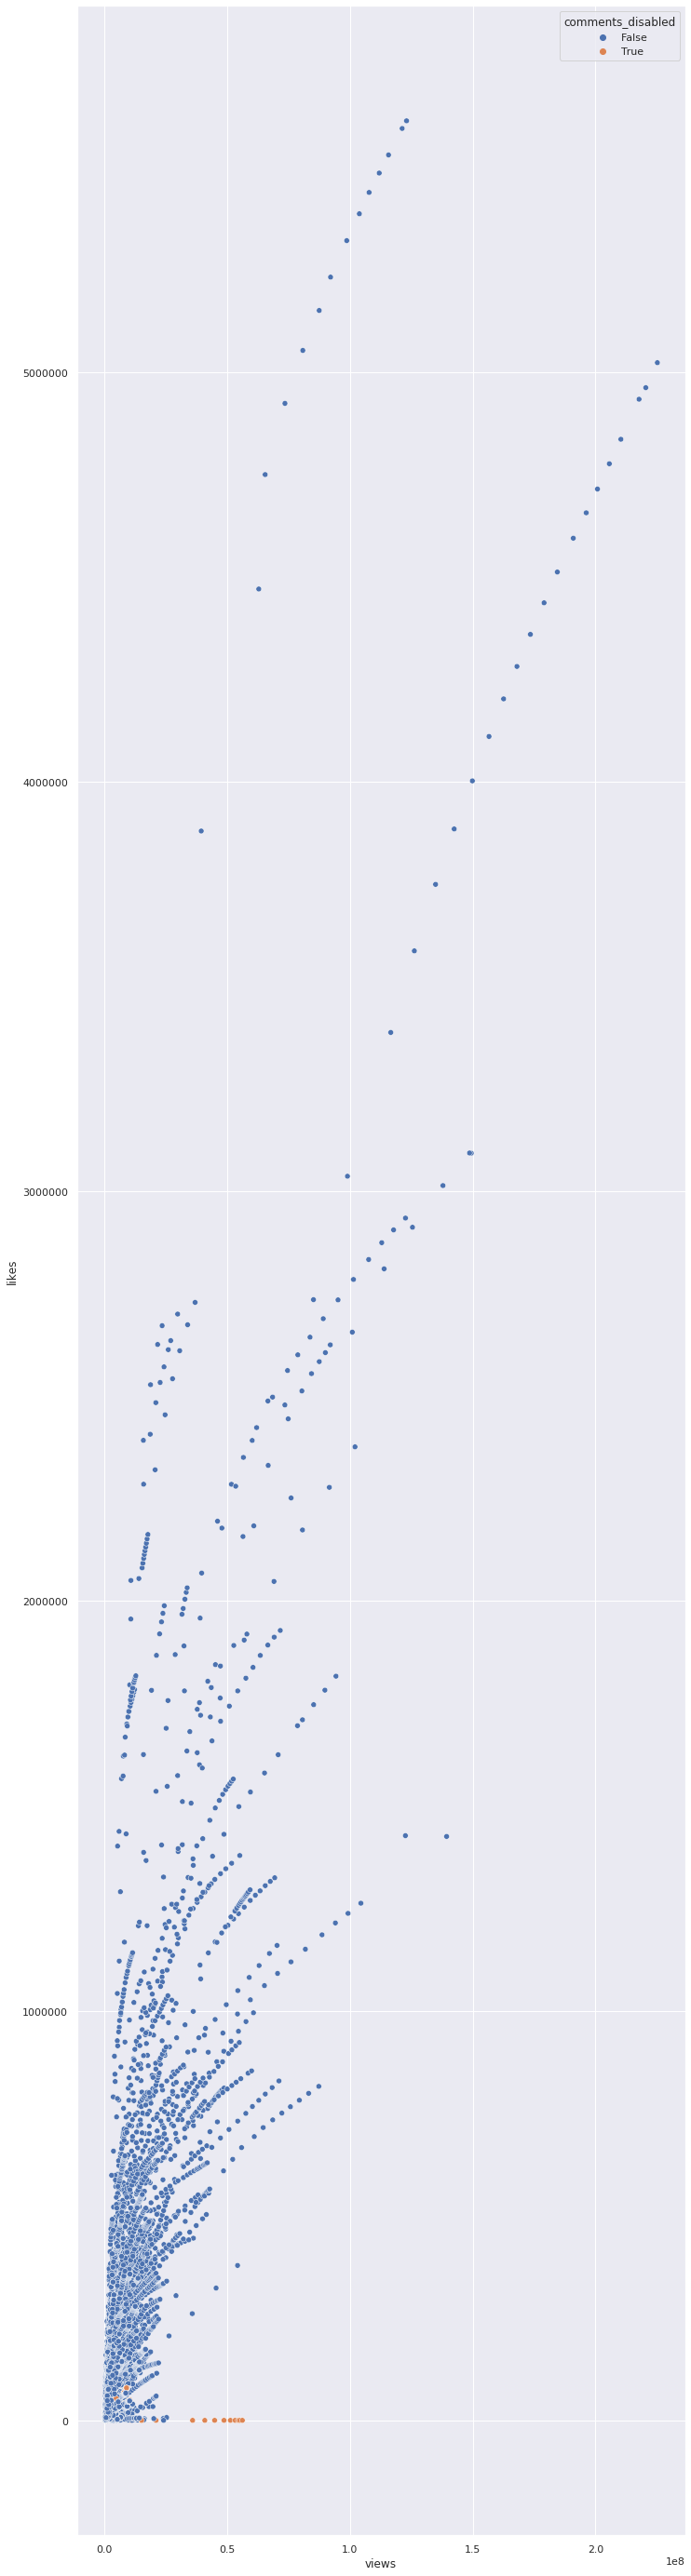

In [175]:
sns.scatterplot(x="views", y="likes", hue="comments_disabled", data=dataUS)